<div style="text-align: center"> <h1>Project Report</h1></div>

***

<div style="text-align: center"> <h2>Predicting Occupation Using Knn-Classifciation</h2></div>

<h4> Introduction </h4>

A person's occupation has a significant impact on their lifestyle and health. Overall well-being can be influenced by a number of work-related factors, including physical demands, irregular hours, sedentary positions, and stress related to one's job. Maintaining a healthy balance between work obligations and personal well-being is essential for a long-lasting and satisfying career. The following suggestion is based on this awareness:

Our work is founded on the concept that different occupational categories may show certain patterns in health and wellness parameters, allowing one to infer a person's career from variables like stress and sleep habits.

Our research aims to determine whether it is possible to predict an individual's occupation using predictor variables from the dataset of interest. 

The Sleep Health and Lifestyle Dataset includes data on gender, age, occupation, sleep metrics, physical activity, stress levels, BMI, cardiovascular health, and sleep disorders. The dataset's columns consist of Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleep Disorder Status (None, Insomnia, Sleep Apnea). This dataset facilitates in-depth analysis of sleep patterns, lifestyle factors, cardiovascular health, and sleep disorders for a diverse population.
The Hypothesis underlying our study is that distinct occupational categories may exhibit specific patterns in health and wellness factors, making it possible to infer a person's profession based on factors such as sleep and stress levels. 


In [2]:
library(repr)
library(tidyverse)
install.packages("janitor")
install.packages("kknn")
library(janitor)
library(ggplot2)
library(kknn)
library(tidymodels)


url  <- "https://raw.githubusercontent.com/hmza-exe/DSCI-100-GroupProject_003-12/main/Sleep_health_and_lifestyle_dataset.csv"
sleep_health_data <- read_csv(url) |> 
                        rename("person_id" = "Person ID",
                               "gender" = "Gender",
                               "age" = "Age", "occupation" = "Occupation",
                               "sleep_duration" = "Sleep Duration",
                               "quality_of_sleep" = "Quality of Sleep",
                               "physical_activity_level" = "Physical Activity Level",
                               "stress_level" = "Stress Level",
                               "bmi_category" = "BMI Category",
                               "blood_pressure" = "Blood Pressure",
                               "heart_rate" = "Heart Rate",
                               "daily_steps" = "Daily Steps",
                               "sleep_disorder" = "Sleep Disorder")|>
                        select(occupation, daily_steps, physical_activity_level, stress_level, quality_of_sleep, sleep_duration)
head(sleep_health_data)
tail(sleep_health_data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Software Engineer,4200,42,6,6,6.1
Doctor,10000,60,8,6,6.2
Doctor,10000,60,8,6,6.2
Sales Representative,3000,30,8,4,5.9
Sales Representative,3000,30,8,4,5.9
Software Engineer,3000,30,8,4,5.9


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.0
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1


In [10]:
sleep_health_data_scaled <- sleep_health_data |>
                        mutate(scaled_daily_steps = scale(daily_steps, center = TRUE),
                               scaled_physical_activity = scale(physical_activity_level, center = TRUE),
                                scaled_stress_level = scale(stress_level, center = TRUE),
                              scaled_quality_of_sleep = scale(quality_of_sleep, center = TRUE),
                              scaled_sleep_duration = scale(sleep_duration, center = TRUE)) |>
                              filter(occupation != "Software Engineer" )|>
filter(occupation != "Sales Representative")
head(sleep_health_data_scaled)
tail(sleep_health_data_scaled)

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration,scaled_daily_steps,scaled_physical_activity,scaled_stress_level,scaled_quality_of_sleep,scaled_sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Doctor,10000,60,8,6,6.2,1.9674419,0.03979093,1.4736175,-1.0968108,-1.1714669
Doctor,10000,60,8,6,6.2,1.9674419,0.03979093,1.4736175,-1.0968108,-1.1714669
Teacher,3500,40,7,6,6.3,-2.0500728,-0.92032565,0.9100869,-1.0968108,-1.0457846
Doctor,8000,75,6,7,7.8,0.7312835,0.75987836,0.3465563,-0.2613582,0.8394505
Doctor,8000,75,6,7,7.8,0.7312835,0.75987836,0.3465563,-0.2613582,0.8394505
Doctor,8000,75,6,7,7.8,0.7312835,0.75987836,0.3465563,-0.2613582,0.8394505


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration,scaled_daily_steps,scaled_physical_activity,scaled_stress_level,scaled_quality_of_sleep,scaled_sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498
Nurse,7000,75,3,9,8.0,0.1132043,0.7598784,-1.344036,1.409547,1.090815
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498


In [11]:
sleep_health_data_split <- initial_split(sleep_health_data, prop = 0.75, strata = occupation)


sleep_train <- training(sleep_health_data_split)   
sleep_test <- testing(sleep_health_data_split)

head(sleep_train)
head(sleep_test)

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Doctor,10000,60,8,6,6.2
Doctor,10000,60,8,6,6.2
Software Engineer,3000,30,8,4,5.9
Doctor,8000,75,6,7,7.8
Doctor,8000,75,6,7,7.8
Doctor,8000,75,6,7,7.8


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Doctor,8000,30,8,6,6.0
Nurse,4000,40,7,5,6.5
Doctor,8000,75,6,7,7.9
Doctor,8000,75,6,7,7.9
Doctor,8000,75,6,7,7.7
Doctor,8000,75,6,7,7.6


! Fold1: internal:
  There were 8 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): 'Ma...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 r...

! Fold2: internal:
  There were 8 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): 'Ma...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 r...

! Fold3: internal:
  There were 8 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): 'Ma..

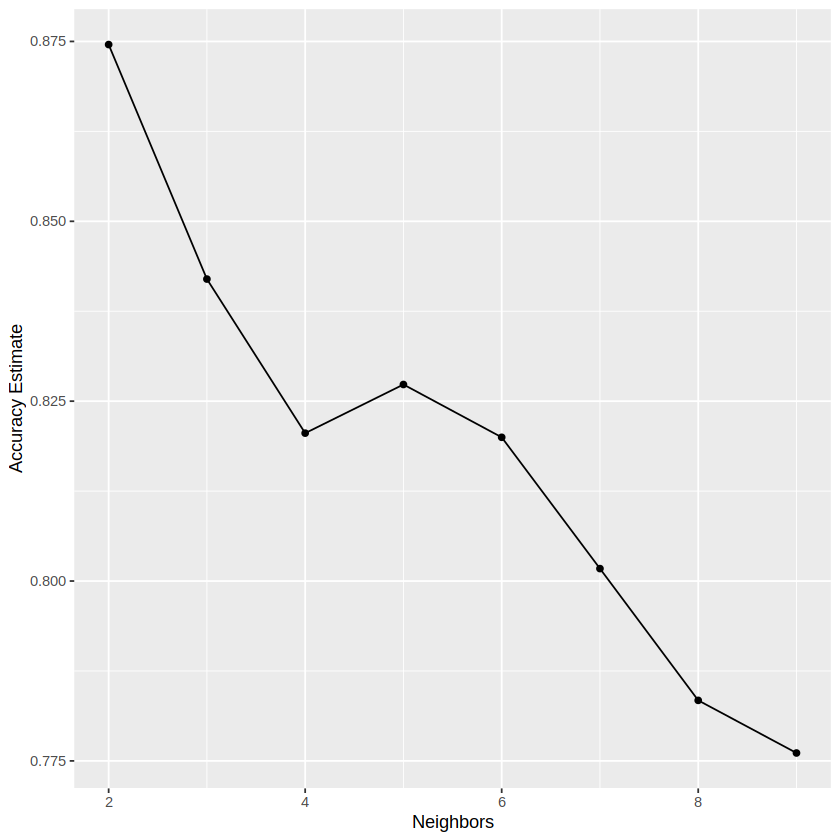

In [12]:
sleep_recipe <- recipe(occupation ~ ., data = sleep_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

sleep_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

sleep_vfold <- vfold_cv(sleep_train, v = 5, strata = occupation)
k_vals <- tibble(neighbors = seq(from = 2, to = 9))

sleep_results <- workflow() |>
add_recipe(sleep_recipe) |>
add_model(sleep_spec) |>
tune_grid(resamples = sleep_vfold, grid = k_vals) |>
collect_metrics()

accuracy <- sleep_results |>
filter(.metric == "accuracy")

cross_val_plot <- accuracy |>
ggplot(aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Accuracy Estimate")

cross_val_plot 


ERROR: Error in tune_grid(sleep_wkflw, resamples = sleep_vfold, grid = k_vals): object 'sleep_wkflw' not found


optimal k-value is 2: we now build our model spec and workflow for k = 2

In [15]:
sleep_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
set_engine("kknn") |>
set_mode("classification")

sleep_fit <- workflow() |>
add_recipe(sleep_recipe) |>
add_model(sleep_spec) |>
fit(data = sleep_train) 


now we predict the labels for our test data and evaluate performance:

In [22]:
occupation_predictions <- predict(sleep_fit, sleep_test) |>
  bind_cols(sleep_test)

occupation_predictions |>
  metrics(truth = occupation, estimate = .pred_class) |>
  filter(.metric == "accuracy")

ERROR: [1m[33mError[39m in `metric_set()`:[22m
[33m![39m Failed to compute `rmse()`.
[1mCaused by error in `dplyr::summarise()`:[22m
[1m[22m[36mℹ[39m In argument: `.estimate = metric_fn(truth = occupation, estimate =
  .pred_class, na_rm = na_rm)`.
[1mCaused by error in `validate_class()`:[22m
[33m![39m `truth` should be a numeric but a character was supplied.


<h4>Discussion</h4>

<h4>References</h4>

Tharmalingam, L. (2023, September 18). Sleep health and lifestyle dataset. Kaggle. https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset 